In [1]:
# !pip install numpy opencv-python matplotlib scikit-image
!pip install torch-fidelity

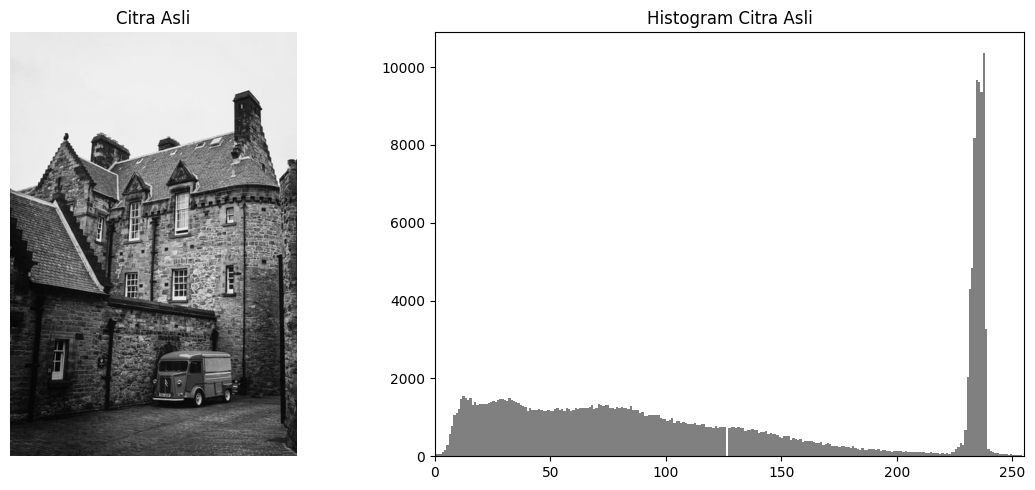

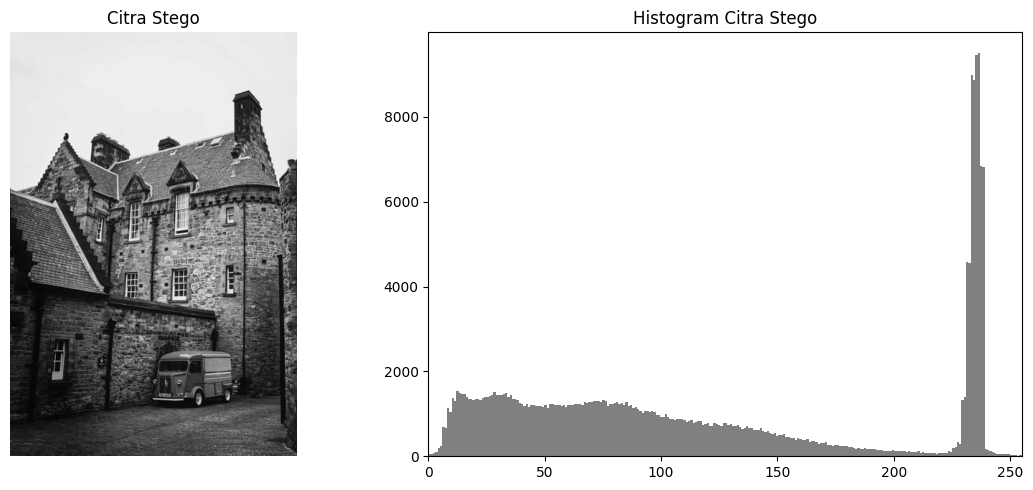

PSNR: 51.1371805480 dB
MSE: 0.5004518581
SSIM: 0.9976368507
Pesan berhasil diekstraksi kembali: True


In [2]:
# Install jika belum:
# !pip install numpy opencv-python matplotlib scikit-image

import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as ssim
from PIL import Image
import random

# 1. Baca gambar sebagai grayscale
img = cv2.imread('img25.png', cv2.IMREAD_GRAYSCALE)

# 2. Tampilkan citra asli dan histogram-nya
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].imshow(img, cmap='gray')
ax[0].set_title("Citra Asli")
ax[0].axis('off')
ax[1].hist(img.ravel(), bins=256, color='gray')
ax[1].set_title("Histogram Citra Asli")
ax[1].set_xlim([0, 255])
plt.tight_layout()
plt.show()

# 3. Persiapan penyisipan
height, width = img.shape
total_pixels = height * width
random_bits = np.random.choice([0, 1], total_pixels)

# 4. Lakukan embed 1 LSB
stego = img.copy()
flat_img = img.flatten()
for i in range(total_pixels):
    pixel_bin = np.binary_repr(flat_img[i], width=8)
    new_bin = pixel_bin[:-1] + str(random_bits[i])
    flat_img[i] = int(new_bin, 2)
stego = flat_img.reshape(img.shape)

# 5. Tampilkan citra stego dan histogram-nya
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].imshow(stego, cmap='gray')
ax[0].set_title("Citra Stego")
ax[0].axis('off')
ax[1].hist(stego.ravel(), bins=256, color='gray')
ax[1].set_title("Histogram Citra Stego")
ax[1].set_xlim([0, 255])
plt.tight_layout()
plt.show()

# 6. Hitung metrik PSNR, MSE, SSIM
mse = np.mean((img - stego) ** 2)
psnr = 10 * np.log10(255 ** 2 / mse)
ssim_val = ssim(img, stego)

print(f'PSNR: {psnr:.10f} dB')
print(f'MSE: {mse:.10f}')
print(f'SSIM: {ssim_val:.10f}')

# 7. Ekstraksi pesan
extracted_bits = []
flat_stego = stego.flatten()
for i in range(total_pixels):
    pixel_bin = np.binary_repr(flat_stego[i], width=8)
    extracted_bits.append(int(pixel_bin[-1]))

# 8. Validasi keberhasilan ekstraksi
is_equal = np.array_equal(random_bits, extracted_bits)
print("Pesan berhasil diekstraksi kembali:", is_equal)


In [3]:
import os
import numpy as np
from PIL import Image
from torch_fidelity import calculate_metrics

# Pastikan folder output untuk referensi dan hasil stego ada
os.makedirs("ref1a", exist_ok=True)  # Folder citra asli
os.makedirs("ref1b", exist_ok=True)  # Folder citra stego

# Pastikan tipe data uint8
img_uint8 = np.uint8(img)
stego_uint8 = np.uint8(stego)

# Konversi grayscale ke RGB untuk keperluan FID
img_rgb = Image.fromarray(img_uint8).convert("RGB")
stego_rgb = Image.fromarray(stego_uint8).convert("RGB")

# Simpan sebagai file PNG
img_rgb.save("ref1a/img.png")
stego_rgb.save("ref1b/img.png")

# Hitung metrik FID
metrics = calculate_metrics(
    input1='ref1a',
    input2='ref1b',
    cuda=False,     # Ubah ke True jika pakai GPU
    isc=False,
    fid=True,
    kid=False
)

print("FID (reference):", metrics['frechet_inception_distance'])


Creating feature extractor "inception-v3-compat" with features ['2048']
Extracting statistics from input 1
Looking for samples non-recursivelty in "ref1a" with extensions png,jpg,jpeg
Found 1 samples
/usr/local/lib/python3.11/dist-packages/torch_fidelity/datasets.py:16: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  img = torch.ByteTensor(torch.ByteStorage.from_buffer(img.tobytes())).view(height, width, 3)
/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow o

FID (reference): 1.0963331210102316


Processing samples
Frechet Inception Distance: 1.0963331210102316


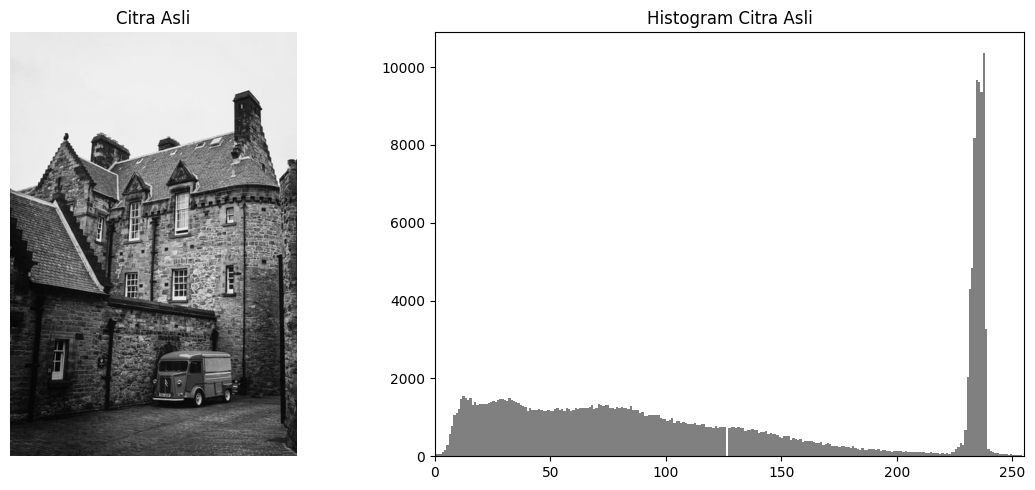

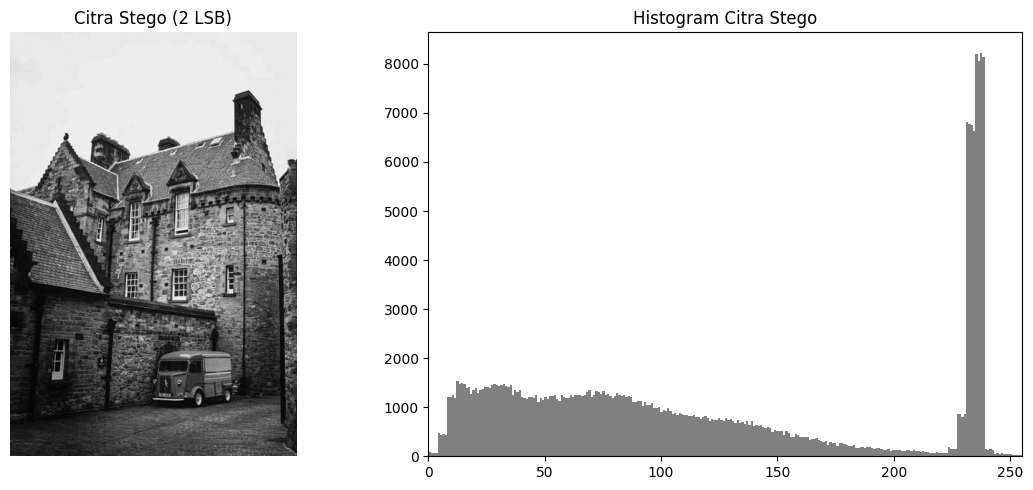

PSNR: 44.1840096706 dB
MSE: 2.4813006757
SSIM: 0.9891236444
Pesan berhasil diekstraksi kembali: True


In [4]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as ssim

# Baca gambar grayscale
img = cv2.imread('img25.png', cv2.IMREAD_GRAYSCALE)

# Tampilkan citra asli + histogram berdampingan
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].imshow(img, cmap='gray')
ax[0].set_title("Citra Asli")
ax[0].axis('off')
ax[1].hist(img.ravel(), bins=256, color='gray')
ax[1].set_title("Histogram Citra Asli")
ax[1].set_xlim([0, 255])
plt.tight_layout()
plt.show()

# Persiapan data
height, width = img.shape
total_pixels = height * width
total_bits = total_pixels * 2  # karena 2 LSB per piksel
random_bits = np.random.choice([0, 1], total_bits)

# Proses penyisipan 2 LSB
stego = img.copy().flatten()
for i in range(total_pixels):
    original_bin = np.binary_repr(stego[i], width=8)
    bit1 = str(random_bits[2 * i])
    bit2 = str(random_bits[2 * i + 1])
    new_bin = original_bin[:-2] + bit1 + bit2
    stego[i] = int(new_bin, 2)
stego = stego.reshape(img.shape)

# Tampilkan citra stego + histogram berdampingan
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].imshow(stego, cmap='gray')
ax[0].set_title("Citra Stego (2 LSB)")
ax[0].axis('off')
ax[1].hist(stego.ravel(), bins=256, color='gray')
ax[1].set_title("Histogram Citra Stego")
ax[1].set_xlim([0, 255])
plt.tight_layout()
plt.show()

# Hitung metrik
mse = np.mean((img - stego) ** 2)
psnr = 10 * np.log10(255 ** 2 / mse)
ssim_val = ssim(img, stego)

print(f'PSNR: {psnr:.10f} dB')
print(f'MSE: {mse:.10f}')
print(f'SSIM: {ssim_val:.10f}')

# Ekstraksi pesan dari 2 LSB
extracted_bits = []
flat_stego = stego.flatten()
for i in range(total_pixels):
    stego_bin = np.binary_repr(flat_stego[i], width=8)
    extracted_bits.append(int(stego_bin[-2]))  # LSB kedua
    extracted_bits.append(int(stego_bin[-1]))  # LSB pertama

# Validasi
is_equal = np.array_equal(random_bits, extracted_bits)
print("Pesan berhasil diekstraksi kembali:", is_equal)


In [5]:
import os
import numpy as np
from PIL import Image
from torch_fidelity import calculate_metrics

# Pastikan folder output untuk referensi dan hasil stego ada
os.makedirs("ref2a", exist_ok=True)  # Folder citra asli
os.makedirs("ref2b", exist_ok=True)  # Folder citra stego

# Pastikan tipe data uint8
img_uint8 = np.uint8(img)
stego_uint8 = np.uint8(stego)

# Konversi grayscale ke RGB untuk keperluan FID
img_rgb = Image.fromarray(img_uint8).convert("RGB")
stego_rgb = Image.fromarray(stego_uint8).convert("RGB")

# Simpan sebagai file PNG
img_rgb.save("ref2a/img.png")
stego_rgb.save("ref2b/img.png")

# Hitung metrik FID
metrics = calculate_metrics(
    input1='ref2a',
    input2='ref2b',
    cuda=False,     # Ubah ke True jika pakai GPU
    isc=False,
    fid=True,
    kid=False
)

print("FID (reference):", metrics['frechet_inception_distance'])


Creating feature extractor "inception-v3-compat" with features ['2048']
Extracting statistics from input 1
Looking for samples non-recursivelty in "ref2a" with extensions png,jpg,jpeg
Found 1 samples
Processing samples
Extracting statistics from input 2
Looking for samples non-recursivelty in "ref2b" with extensions png,jpg,jpeg
Found 1 samples
                                                                      

FID (reference): 2.796722754201762


Processing samples
Frechet Inception Distance: 2.796722754201762


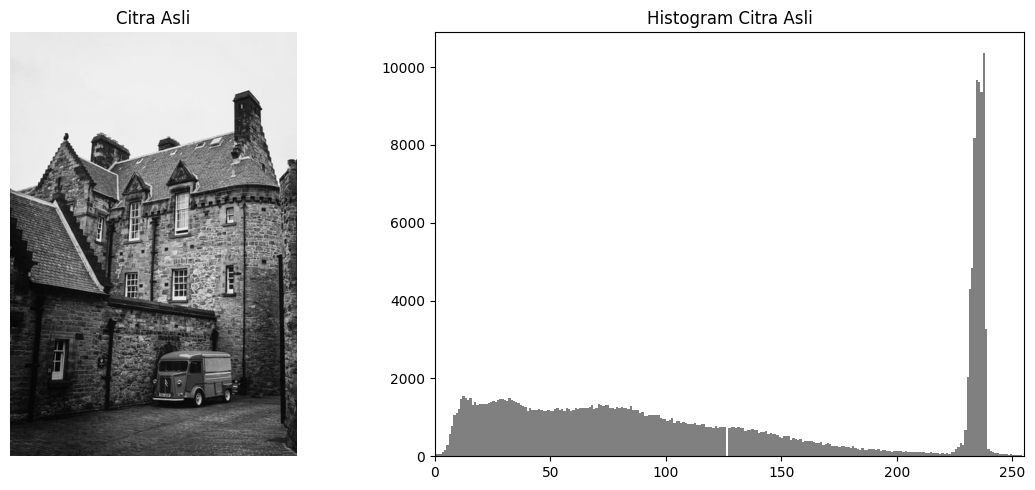

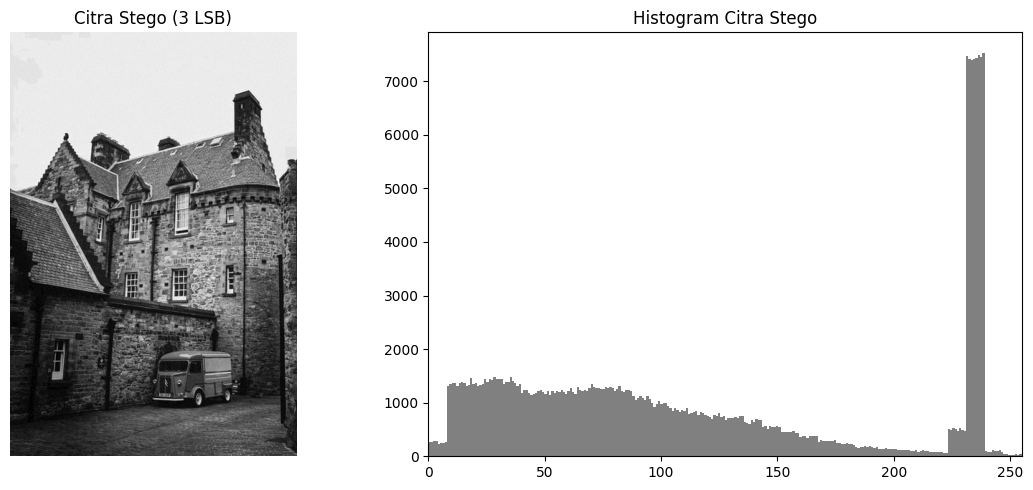

PSNR: 38.0344807556 dB
MSE: 10.2242694257
SSIM: 0.9605192140
Pesan berhasil diekstraksi kembali: True


In [6]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as ssim

# Baca gambar grayscale
img = cv2.imread('img25.png', cv2.IMREAD_GRAYSCALE)

# Tampilkan citra asli dan histogram-nya berdampingan
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].imshow(img, cmap='gray')
ax[0].set_title("Citra Asli")
ax[0].axis('off')
ax[1].hist(img.ravel(), bins=256, color='gray')
ax[1].set_title("Histogram Citra Asli")
ax[1].set_xlim([0, 255])
plt.tight_layout()
plt.show()

# Persiapan embedding
height, width = img.shape
total_pixels = height * width
total_bits = total_pixels * 3  # karena 3 bit per piksel
random_bits = np.random.choice([0, 1], total_bits)

# Proses penyisipan 3 LSB
stego = img.copy().flatten()
for i in range(total_pixels):
    original_bin = np.binary_repr(stego[i], width=8)
    b1 = str(random_bits[3 * i])
    b2 = str(random_bits[3 * i + 1])
    b3 = str(random_bits[3 * i + 2])
    new_bin = original_bin[:-3] + b1 + b2 + b3
    stego[i] = int(new_bin, 2)
stego = stego.reshape(img.shape)

# Tampilkan citra stego dan histogram-nya berdampingan
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].imshow(stego, cmap='gray')
ax[0].set_title("Citra Stego (3 LSB)")
ax[0].axis('off')
ax[1].hist(stego.ravel(), bins=256, color='gray')
ax[1].set_title("Histogram Citra Stego")
ax[1].set_xlim([0, 255])
plt.tight_layout()
plt.show()

# Hitung metrik evaluasi
mse = np.mean((img - stego) ** 2)
psnr = 10 * np.log10(255 ** 2 / mse)
ssim_val = ssim(img, stego)

print(f'PSNR: {psnr:.10f} dB')
print(f'MSE: {mse:.10f}')
print(f'SSIM: {ssim_val:.10f}')

# Ekstraksi pesan dari 3 LSB
extracted_bits = []
flat_stego = stego.flatten()
for i in range(total_pixels):
    stego_bin = np.binary_repr(flat_stego[i], width=8)
    extracted_bits.append(int(stego_bin[-3]))  # bit ke-6 (LSB ke-3)
    extracted_bits.append(int(stego_bin[-2]))  # bit ke-7 (LSB ke-2)
    extracted_bits.append(int(stego_bin[-1]))  # bit ke-8 (LSB ke-1)

# Validasi apakah pesan berhasil diekstraksi
is_equal = np.array_equal(random_bits, extracted_bits)
print("Pesan berhasil diekstraksi kembali:", is_equal)


In [7]:
import os
import numpy as np
from PIL import Image
from torch_fidelity import calculate_metrics

# Pastikan folder output untuk referensi dan hasil stego ada
os.makedirs("ref3a", exist_ok=True)  # Folder citra asli
os.makedirs("ref3b", exist_ok=True)  # Folder citra stego

# Pastikan tipe data uint8
img_uint8 = np.uint8(img)
stego_uint8 = np.uint8(stego)

# Konversi grayscale ke RGB untuk keperluan FID
img_rgb = Image.fromarray(img_uint8).convert("RGB")
stego_rgb = Image.fromarray(stego_uint8).convert("RGB")

# Simpan sebagai file PNG
img_rgb.save("ref3a/img.png")
stego_rgb.save("ref3b/img.png")

# Hitung metrik FID
metrics = calculate_metrics(
    input1='ref3a',
    input2='ref3b',
    cuda=False,     # Ubah ke True jika pakai GPU
    isc=False,
    fid=True,
    kid=False
)

print("FID (reference):", metrics['frechet_inception_distance'])


Creating feature extractor "inception-v3-compat" with features ['2048']
Extracting statistics from input 1
Looking for samples non-recursivelty in "ref3a" with extensions png,jpg,jpeg
Found 1 samples
Processing samples
Extracting statistics from input 2
Looking for samples non-recursivelty in "ref3b" with extensions png,jpg,jpeg
Found 1 samples
                                                                      

FID (reference): 5.146821502777996


Processing samples
Frechet Inception Distance: 5.146821502777996
